# Regression: simple, multiple and polynomial regression

One of the most common tasks in Data Science, Machine Learning, etc. are regression problems. That is, given an independent variable (or a pair of independent variables), we seek to predict a value, which would be a dependent variable. Usually, the set of data that makes up our independent variable, or our data, is represented with the letter $X$, while $y$ is used to express the dependent variable, the value we are looking for. The latter is a number that belongs to the real numbers ($y\in\mathbb{R}$).

To achieve this, there are several methods that are responsible for modeling this relationship between our data. One of the most popular and simple ones is linear regression, which has been modified to model with multiple independent variables or more complex relationships between the data. Here, in this notebook, we will explore and give a brief introduction to three different methods to tackle the regression problem: Simple linear regression, multiple linear regression, and polynomial regression.

## Simple lineal Regression

Simple linear regression can be seen as a line fitted to your data set, therefore, being limited to a straight line, it assumes that your data follow a relationship of this type between them, so that if a value $X$ increases or decreases, its corresponding value $y$ will do so in a more or less linear manner.

But... How do we find this line? To begin with, let's remember that the equation of a line is defined as:

$$y=mx + b$$

where $m$ is the slope, which determines how steep our line will be, and $b$ is the $y$-intercept. Knowing this, we can start by assuming that if our data follows a linear relationship, then we could reformulate this equation to model the relationship between our variables, so that:

$$(1)\space \space y_i = \beta_0 + \beta_1X_i$$ 

where now $\beta_1$ will be called our coefficient and $\beta_0$ the intercept, whose values we will have to find, while $y_i$ and $X_i$ are each one of our data points, whose values we already know beforehand. And that's it! Or is it? Well, theoretically... it is, but the reality is more complex and the fact is that our data will never fit that perfect line, since they will contain a certain degree of noise. Therefore, the main idea of linear regression is to find a line that minimizes the errors between each of our points with a predicted line, which can be achieved by varying the values of $\beta_0$ and $\beta_1$. If you search on the internet, for this purpose, two methods are commonly used: Least Squares and _gradient descent_.

We won't discuss gradient descent here, but it's certainly a very important concept, especially in the field of neural networks. Meanwhile, to find the value $B_1$ using least squares for regression, it is formulated as follows:

$$(2)\space \space \beta_1 = \frac{n(\sum{xy})-(\sum{x})(\sum{y})}{n(\sum{x^2})-(\sum{x})^{2}}$$

Where $n$ is the number of examples or data we have. While to obtain $\beta_0$

$$(3)\space \space \beta_0 = \frac{(\sum{y})(\sum{x^2})-(\sum{x})(\sum{xy})}{n(\sum{x^2})-(\sum{x})^{2}}$$

It is worth noting that both $(2)$ and $(3)$ work very well when $X$ has only one feature, that is, $X$ is a vector. If that is not the case with your data, a few more things come into play (see multiple and polynomial linear regression).

Now we're ready! We can start building our regression code. Let's import our libraries and build our class called __myLinearRegression__.

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline
sns.set_theme()

In [3]:
class myLinealRegression:
    
    def __init__(self):

        self.b1 = None
        self.b0 = None
        
    def fit(self, X, y):
    
        '''
        Training a simple Lineal Regression model
        
        X: A numeric single 1d array or array-like for training
        y: A numeric single 1d array or array-like for training (predict)
        '''
        
        self.X = np.array(X).ravel()
        self.Y = np.array(y).ravel()

        # Defining numerator and denominator as shown on (2) to find B_1
        num = self.X.shape[0] * np.sum(self.X * self.Y) - self.X.sum() * self.Y.sum()
        den = self.X.shape[0] * np.sum(self.X**2) - np.square(self.X.sum())
        
        # Getting B_1
        self.b1 = num / den

        # Defining denominator as shown on (3) to find B_0. Denominator is the same as (2)
        num = self.Y.sum() * np.sum(self.X ** 2) - self.X.sum() * np.sum(self.X * self.Y)
        
        # Getting B_0
        self.b0 = num / den
    
    def predict(self, data):

        '''
        Predict a new value given the coeficients learnt
        '''
    
        y_pred = self.b0 + self.b1 * data
        return y_pred

As you can see, a class with two methods was created. In the first one, fit, our model will be trained and will obtain the coefficients of the line $b_0$ and $b_1$ based on formula $(2)$ and a pair of data that we pass to it. Once it learns that, we can call the other method _predict_, which, given our formula $(1)$, will predict the respective value with the learned coefficients. Now, let's create a couple of data, draw their graph, divide them between our training and test data, and train the model...

In [4]:
# Toy data
X, y = make_regression(n_samples=300, n_features=1, noise=10, random_state=42)

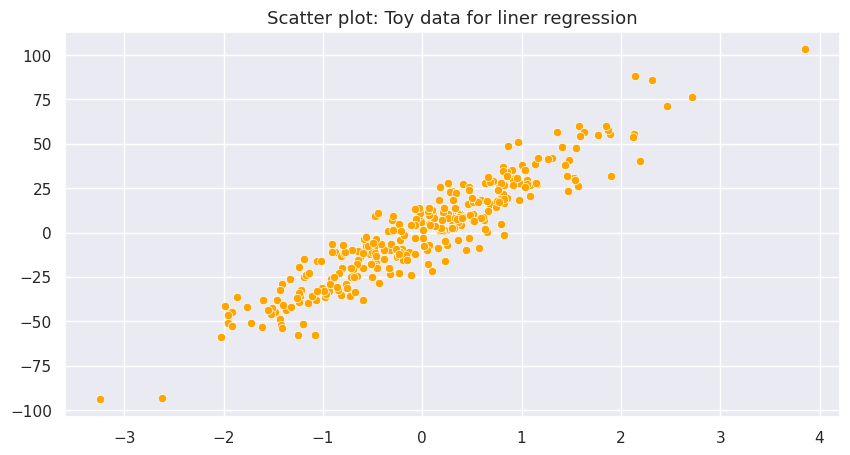

In [5]:
fig, axis = plt.subplots(1,1, figsize=(10,5))

sns.scatterplot(x=X.reshape(-1,), y=y, color="orange", ax=axis)

plt.title("Scatter plot: Toy data for liner regression", fontdict={"size":13})
plt.show()

In [6]:
# Splitting 70-30
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

# Creating the object of lineal regression and training/testing
reg = myLinealRegression()
reg.fit(X_train, y_train)

print("\nb_0 = ", reg.b0)
print("b_1 = ", reg.b1)


b_0 =  0.10789680627834558
b_1 =  27.671797522892437


As you can see, we obtained...

$$b_0 = 0.107$$
$$b_1 = 27.67$$

and we'll formula will be

$$y_i = 0.107 + 27.67X_i$$

Let's see that in a chart

In [7]:
y_hat = reg.predict(X_test)
y_line = reg.predict(X_train)

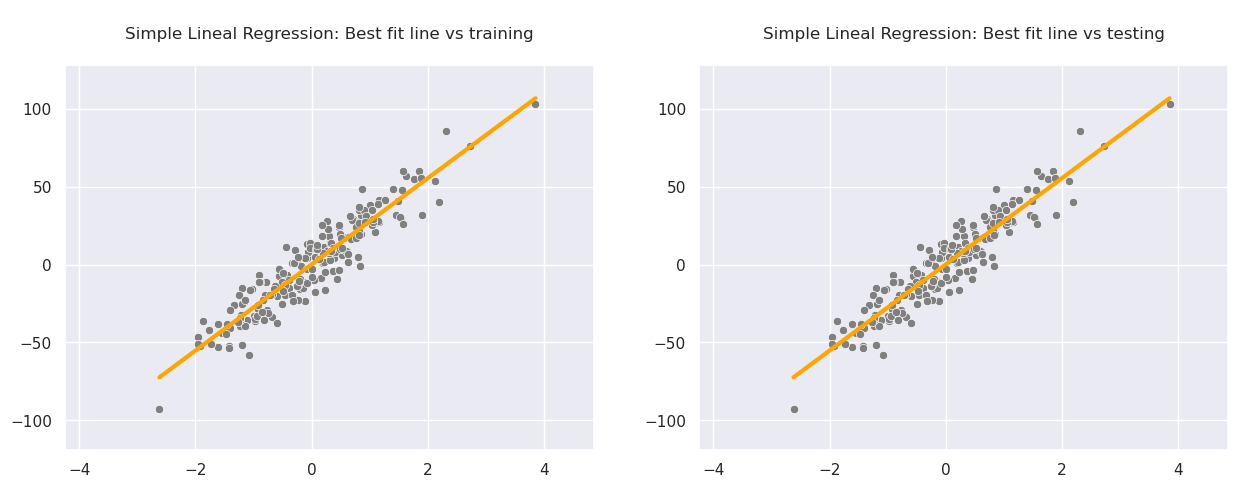

In [8]:
fig, axis = plt.subplots(1,2, figsize=(15,5))
titles = ["\nSimple Lineal Regression: Best fit line vs training\n",
          "\nSimple Lineal Regression: Best fit line vs testing\n"]

for ax, t in zip(axis, titles):

    sns.scatterplot(x=X_train.reshape(-1,), y=y_train.reshape(-1,), ax=ax, color="gray")
    sns.lineplot(x=X_train.reshape(-1,), y=y_line.reshape(-1,), ax=ax, color="orange", linewidth=3)
    
    ax.set_xlim([X.min() - 1 ,X.max() + 1])
    ax.set_ylim([y.min() -25 ,y.max() + 25])
    ax.set_title(t)

plt.show()

#### Evaluation

Visualmente, we observe that the model fits well for both the train and test data sets, probably performing well if we continue to try to predict with new data. But how could we evaluate this model in numerical terms? How can we make this model comparable with others that can be tested? For regression models, there is a metric that is commonly used for this evaluation: $R^2$.

$R^2$ is the coefficient of determination, in other words, the proportion of the variance for a dependent variable that is explained by an independent variable, whose values usually range from 0 to 1 (although it can also be a negative number, indicating a terribly horrible model), where the achievement is that the model evaluation approaches as close as possible to 1.

$$r^2 = 1 - \frac{RSS}{TSS} = 1 - \frac{\sum(\hat{Y} - \overline{Y})}{\sum(Y - \overline{Y})}$$

#### Sklearn

We have created the simple linear regression model from scratch, and in the same way, we could program the $R^2$ evaluation, but as always, there are several libraries that make our lives easier. One of them, which for simplicity we will be using in the rest of the notebook, is sklearn.

Sklearn provides access to a varied set of tools from data preprocessing to the creation and evaluation of machine learning models. Among these tools is the direct use of training a linear regression model and evaluating it through a simple function call. In fact, we have already used it previously to generate test data. Let's evaluate our model using $R^2$ and also compare the coefficients that sklearn returns to those of our created function (__myLinearRegression__).

In [9]:
# Evaluation fo the model
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_hat)
print(f"R2: {r2}")

R2: 0.8871493970971712


A quite good $R^2$, now let's try with the regression provided by sklearn and compare.

In [10]:
from sklearn.linear_model import LinearRegression

# Crating the object y training using the method "fit"

reg_skln = LinearRegression()
reg_skln.fit(X_train, y_train)

print("Coefficients learnt by sklearn")
print(f"b0: {reg_skln.intercept_}")
print(f"b1: {reg_skln.coef_[0]}")

Coefficients learnt by sklearn
b0: 0.10789680627834586
b1: 27.671797522892426


As you can see, they are exactly the same values as those obtained with our function, so if there were any doubts, we implemented our class __myLinearRegression__ correctly. It is expected that we will obtain the same $R^2$, but let's test it.

In [11]:
y_hat_sklean = reg_skln.predict(X_test)

r2_sklearn = r2_score(y_test, y_hat_sklean)
print(f"R2: {r2_sklearn}")

R2: 0.8871493970971712


In conclusion, in this part we learned that the simple linear regression model assumes linearity between your data, where you have one independent variable x and one dependent variable y. This is commonly done using the method of least squares and evaluating the model using $r^2$. Additionally, there are already alternatives that make it easier to obtain and train these models, and sklearn is one of the most popular options.

## Multiple Lineal Regression

Multiple linear regression is quite similar to simple regression, it is based on the same principles, but now it models multiple independent variables $X$ (many features in your data or data in matrix form) with a dependent variable $y$. Since there are multiple variables, the number of coefficients to be obtained increases in the same way, so it will now be defined as

$$y = b_0 + b_1X_1 + b_2X_2 +...b_nX_n$$

Multiple linear regression does some assumtions
    
    * Linear relationship
    * Multivariate normality
    * No or little multicollinearity
    * No auto-correlation
    * Homoscedasticity
    
We will not describe each of them here, and the fact that your data does not meet one of them does not unequivocally mean that you cannot train the model, but certainly its performance may not be the same. If you want more information about each of the assumptions, you can check out this [page](https://pythonfordatascienceorg.wordpress.com/linear-regression-python/).. In our case, we will not review those assumptions with our data.

Similar to simple linear regression, the values of the coefficients in multiple linear regression can be found through the method of least squares. The difference is that when dealing with more than one independent variable, it is more convenient to develop the problem in matrix form and perform operations that way. Through this, you will arrive at the method of ordinary least squares. You could search on the internet for the proof of how, starting from the definition above of multiple linear regression, its solution can be obtained in matrix form. Finally, it is denoted as

$$\beta = (X^{T} X)^{-1} X^T y$$

Where $X^T$ is the transposed matrix of your data and $(...)^{-1}$ is the inverse of the resulting matrix. Resulting in a vector of $N$ number of $\beta$ as features in your data. As previously mentioned, there is sklearn which makes our lives easier, so we will not create the model from scratch, but simply call and train it. The process is actually quite similar to what was done with simple linear regression. So there will be a lot of recycled code...

Let's create some data with sklearn, a 500 samples y 8 _features_ will be enough...

In [12]:
X, y = make_regression(n_samples=500, n_features=8, n_informative=5, noise=30,random_state=42)

In [13]:
# Showing data generated, features
pd.DataFrame(X)

,0,1,2,3,4,5,6,7
0,-0.483061,-0.891192,0.146793,1.612221,-0.268531,0.895038,-1.581191,0.896839
1,-1.840078,-1.299216,-0.032281,0.640543,-0.113128,2.511557,0.346710,0.123078
2,-2.189922,1.074318,1.194592,0.958386,0.229075,-0.756764,0.232787,0.051661
3,-0.478837,0.617006,-0.862776,0.693479,1.059936,1.097153,-2.153343,-0.392013
4,0.568103,-1.123494,-1.049655,1.362563,3.152057,1.447306,0.506241,1.640615
...,...,...,...,...,...,...,...,...
495,0.820482,0.648710,0.507274,1.066675,1.382159,1.108704,0.590655,1.169296
496,-0.981509,-0.385314,0.462103,0.199060,0.069802,0.010233,1.163164,-0.600217
497,-2.067442,-0.939880,-0.089120,-1.304470,0.366598,-0.032695,0.384065,0.669673
498,1.024063,-0.003374,0.592527,0.778361,-0.818199,1.208366,2.061504,-0.551186


In [14]:
#Showing data generated, target variable
pd.Series(y)

0      -11.942703
1      -56.284543
2      -71.778595
3     -180.946873
4      136.145874
          ...    
495    273.198631
496     23.427271
497   -242.227779
498    277.253711
499    147.409984
Length: 500, dtype: float64

In [15]:
# Splitting training/test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=10)

In [16]:
# Load model, train and show betas
reg = LinearRegression()
reg.fit(X_train, y_train)

print("Beta values learnt by Sklearn implementation")
print(f"b0: {reg.intercept_}")
print(f"bi: {reg.coef_}")

Beta values learnt by Sklearn implementation
b0: -1.4408269159536926
bi: [98.47650192  0.65023766 53.08938033 63.82409579 -0.12033543  6.95682478
 46.00469333 -0.51481889]


As you may notice, we have used the same function as with simple linear regression, but at the same time, we have obtained 8 coefficients $b_1, b_2, b_3 ... b_8$, each corresponding to the respective column of our data as shown when printing $X$ on the screen. Therefore, sklearn will take care of identifying the number of variables in your data and model them, as in this case, as a multiple regression problem.

Now, graphing this is not as simple since the dimensionality exceeds our capacity in our 3-dimensional world. We could take each of these coefficients and graph the resulting line for each pair of our dataset against $y$ (for example, taking the first column of $X$ vs $y$, then the second against $y$, the third against $y$, etc.). This may not be very informative, but let's do it just for fun with the training data...

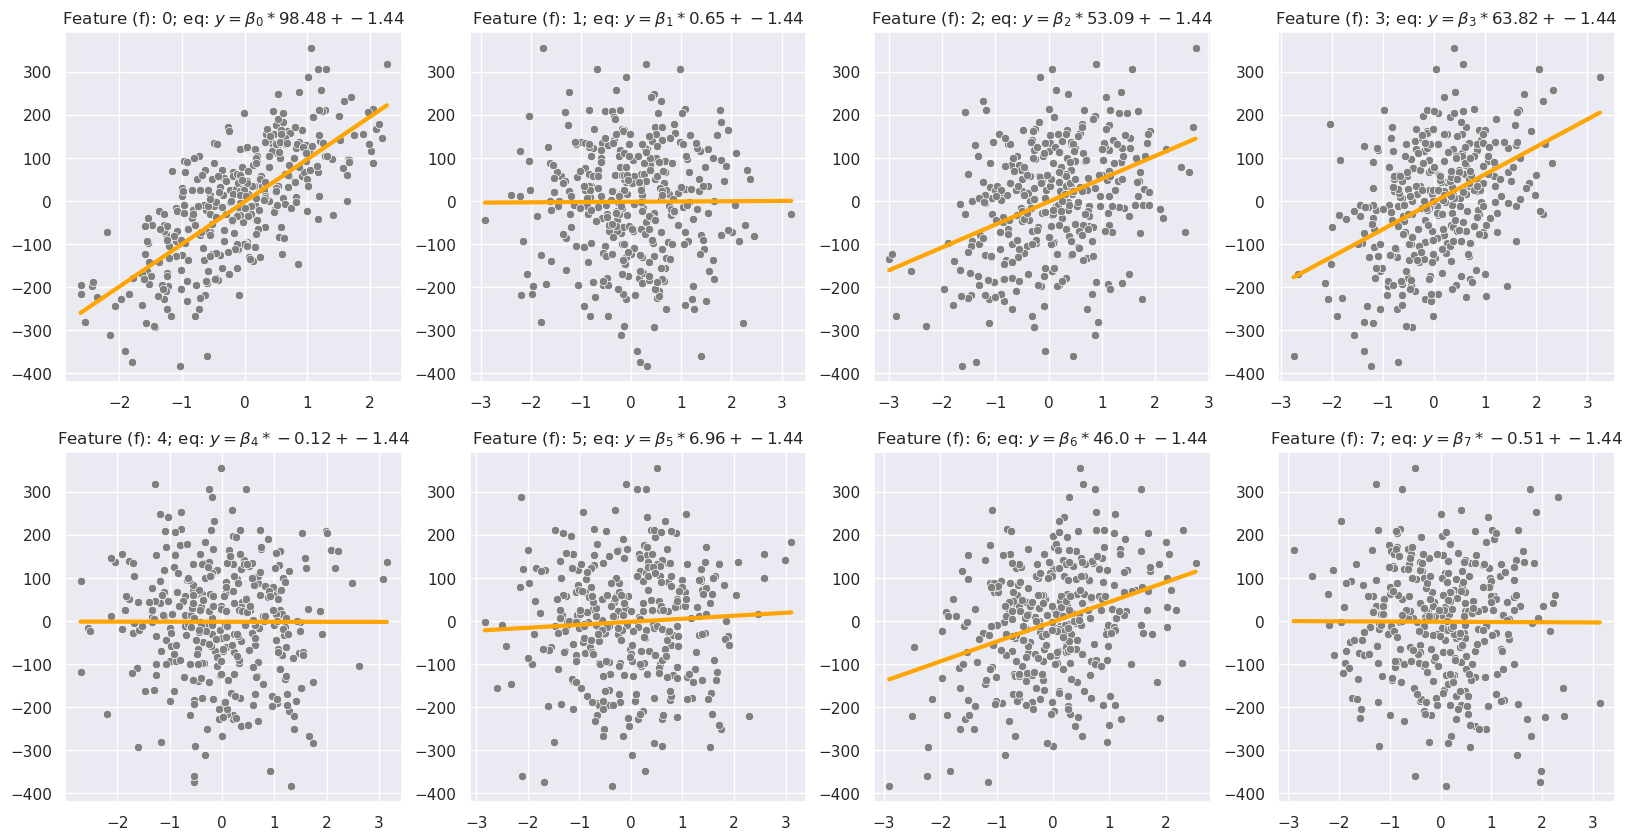

In [17]:
fig, ax = plt.subplots(2,4, figsize=(20,10))

count = 0

for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        
        y_line = X_train[:,count] * reg.coef_[count] + reg.intercept_

        sns.scatterplot(x=X_train[:, count], y=y_train, color="gray", ax=ax[i, j])
        sns.lineplot(x=X_train[:, count], y=y_line, color="orange", linewidth=3, ax=ax[i, j])
        
        coef = np.round(reg.coef_[count], 2)
        inte = np.round(reg.intercept_, 2)
        
        ax[i, j].set_title(f"Feature (f): {count}; eq: $y=\\beta_{count}*{coef} + {inte}$")
        count+=1
plt.show()

In [18]:
# Creating a data frame using the real values found in our training versus the predicted ones

real_vs_predicted_train = np.concatenate((y_train.reshape(-1,1), reg.predict(X_train).reshape(-1,1)), axis=1)
real_vs_predicted_train = pd.DataFrame(real_vs_predicted_train, columns=["Real_train","Predicted_train"])
real_vs_predicted_train

,Real_train,Predicted_train
0,175.580883,159.413742
1,-74.705053,-41.189691
2,-21.408862,-69.897794
3,98.955686,158.905425
4,116.937925,114.492425
...,...,...
345,80.023055,102.546219
346,58.463894,33.481963
347,-91.416069,-8.742627
348,-222.912165,-223.385962


In [19]:
# Creando un data frame con los valores reales en nuestro test, contra los predichos en el mismo test
real_vs_predicted_test = np.concatenate((y_test.reshape(-1,1), reg.predict(X_test).reshape(-1,1)), axis=1)
real_vs_predicted_test = pd.DataFrame(real_vs_predicted_test, columns=["Real_test","Predicted_test"])
real_vs_predicted_test

,Real_test,Predicted_test
0,-10.062991,29.524949
1,260.728879,230.307491
2,-180.539649,-161.160580
3,-91.805080,-58.188108
4,-144.935537,-187.450095
...,...,...
145,-24.871155,-39.192595
146,-205.867895,-197.917985
147,316.225276,316.069033
148,-106.089778,-92.712006


### Evaluation

Now for the evaluation, but... if you remember, it was mentioned that for the evaluation of a regression, we would use $R^2$, but this does not work as well when we have multiple variables, because there can be an overestimation of the model. In other words, as more variables are added to a regression, $r^2$ tends to increase even if the contribution of the variables added to the model is not statistically significant. To solve this, an adjusted $r^2$ is used, which takes into account the introduction of multiple variables.

$$R^{2}_a = 1 - \frac{(n-1)}{n-k-1} (1-R^2)$$

Where $R^2$ is the coefficient of determination, $n$ is the number of observations in the sample, and $k$ is the number of independent variables. Unfortunately, sklearn does not provide us with a direct way to calculate it, so we have to define it ourselves. Let's do it and get its value on our train/test.

In [20]:
def R2_adjusted(X, y_real, y_predict):
    
    # X -> Numpy matrix or matrix-like
    # y_real -> List or numpy array 1D
    # y_predict -> List or numpy array 1D
    
    X = np.array(X)
    y_real = np.array(y_real).ravel()
    y_predict = np.array(y_predict).ravel()
    
    #sklearn r_score
    r2 = r2_score(y_real, y_predict)
    n = y_real.shape[0]
    k = X.shape[1]
    
    #Adjusted r2
    
    R2_ad = 1 - ((n - 1) / (n - k -1))*(1 - r2)
    
    return R2_ad

In [21]:
print("\nAdjusted R2 for training: {}".format(R2_adjusted(X_train, y_train, reg.predict(X_train))))
print("Adjusted R2 for testing: {}\n".format(R2_adjusted(X_test, y_test, reg.predict(X_test))))


Adjusted R2 for training: 0.9504590653685974
Adjusted R2 for testing: 0.9553132226113372



"As you can see, there is still a lot of room for improving the model, in addition to the fact that you can notice that the model performed even worse with our test data (the score on the training set is not very good either). This is where the importance of having two datasets to evaluate the model comes into play, a good score on your training is not synonymous with good performance with unseen data, with which the model was not trained.

Furthermore, to conclude, let's remember again that by decision we only defined one informative feature, but we are training the model with all of them. Showing that training with a larger number of features does not necessarily improve the model, it can even worsen it by introducing noise, try increasing the number of informative features by changing the n_informative parameter. Alternatively, by removing features that do not contribute anything to the model and returning here, play with the data. Did removing features improve the model's performance or make it worse? What if we increase the informative features?...

## Polynomial lineal regression

What happens if your data is not linearly related? For example, what if some of them fit better to a curve than to a straight line? Well, this is where polynomial linear regression comes into play. It is defined as follows:

$$y_i = \beta_0 + \beta_1 X_i+ \beta_2 X_i^2+ \beta_3 X_i^3... + \beta_n X_i^n$$

It may sound a bit contradictory, a linear model but at the same time polynomial? Well, it is still linear in terms of the coefficients, which remain based on $1$. However, it is our data that we are going to transform. Each of our columns in the data will be raised to their respective exponents, exponents that we need to choose initially.

In this way, by having this value 'free' and working with powers, we can model more complex relationships among the data. However, it is computationally more expensive and prone to overfitting the model. Similar to the previous methods, it can be solved using least squares.

Before we start, it is worth noting that the same function is used for linear, multinomial, and polynomial regression. In the case of polynomial regression, we are responsible for raising the data to the exponent of our choice before calling _LinearRegression_. For this, we can use _PolynomialFeatures_, which once again is provided by sklearn. Now, let's import the libraries and create the data...

In [22]:
# Toy data
X, y = make_regression(n_samples=200, n_features=1, noise=3)

# Splitting train/test 70-30
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=3)

# Sorting data to plot. Power to 4th

Matrix_train = np.c_[X_train, y_train]
Matrix_train = Matrix_train[Matrix_train[:,0].argsort()]
X_train, y_train = Matrix_train[:,0], Matrix_train[:,1] ** 4

Matrix_test = np.c_[X_test, y_test]
Matrix_test = Matrix_test[Matrix_test[:,0].argsort()]
X_test, y_test = Matrix_test[:,0], Matrix_test[:,1] ** 4

# Change of dimentionality into something accepted by sklearn
X_train, y_train = X_train.reshape(-1,1), y_train.reshape(-1,1)
X_test,  y_test = X_test.reshape(-1,1), y_test.reshape(-1,1)

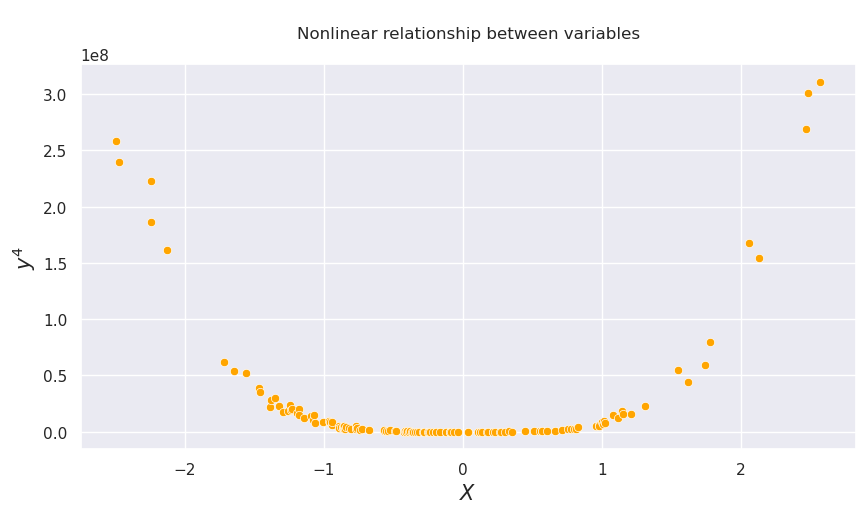

In [23]:
fig, axis = plt.subplots(1,1, figsize=(10, 5))

sns.scatterplot(x=X_train.reshape(-1,), y=y_train.reshape(-1,), c="orange", ax=axis)

axis.set_xlabel("$X$", size=15)
axis.set_ylabel("$y^4$", size=15)
axis.set_title("\nNonlinear relationship between variables\n")

plt.show()

As you can see, by raising $y$ to the fourth power, we remove this linearity. For comparison, let's train two models: a simple linear regression model and a polynomial regression model to evaluate the performance of both.

### Creando modelos y evaluando

In [24]:
# Training linear regression regression

reg_lin = LinearRegression()
reg_lin.fit(X_train, y_train)
y_hat_lin_train = reg_lin.predict(X_train)
y_hat_lin_test = reg_lin.predict(X_test)

r2_score_lin_train = r2_score(y_train, y_hat_lin_train)
r2_score_lin_test = r2_score(y_test, y_hat_lin_test)

If you remember the formula shown at the beginning of this topic, each of our values in X will be raised from a base of 1 up to the chosen power, and for each of those powers, a coefficient will be obtained. For example, let's suppose that we have that X is a vector and we want to raise it to the 3rd power, for that, X must be first raised to the 2nd power (and to the 1st power, which is actually our original X), so instead of just having X^3 as a vector, we will actually have a matrix of X_{n3}, or in other words, a matrix with 3 columns and n rows. That resulting matrix will be used to train LinearRegression and will be obtained using PolynomialFeatures.

In [25]:
Array_X = np.array([1,2,3,4,5]).reshape(-1,1)
Array_X

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [26]:
Pol_test = PolynomialFeatures(degree=3, include_bias=False)
Array_X_pol = Pol_test.fit_transform(Array_X)
Array_X_pol

array([[  1.,   1.,   1.],
       [  2.,   4.,   8.],
       [  3.,   9.,  27.],
       [  4.,  16.,  64.],
       [  5.,  25., 125.]])

In [27]:
# Creating polynomial features.

Poly_convert = PolynomialFeatures(degree=4, include_bias=False)
X_train_poly = Poly_convert.fit_transform(X_train)
X_test_poly = Poly_convert.transform(X_test)

In [28]:
# Training poly regression and evaluation

reg_poly = LinearRegression()
reg_poly.fit(X_train_poly, y_train)

y_hat_poly_train = reg_poly.predict(X_train_poly)
y_hat_poly_test = reg_poly.predict(X_test_poly)

r2_score_poly_train = r2_score(y_train, y_hat_poly_train)
r2_score_poly_test  = r2_score(y_test,  y_hat_poly_test)

Let's see these two models graphically for both our training and testing data, at the same time let's place their respective values of $R^2$. The respective models are Slr for Simple Linear Regression and Plr for Polynomial Linear Regression.

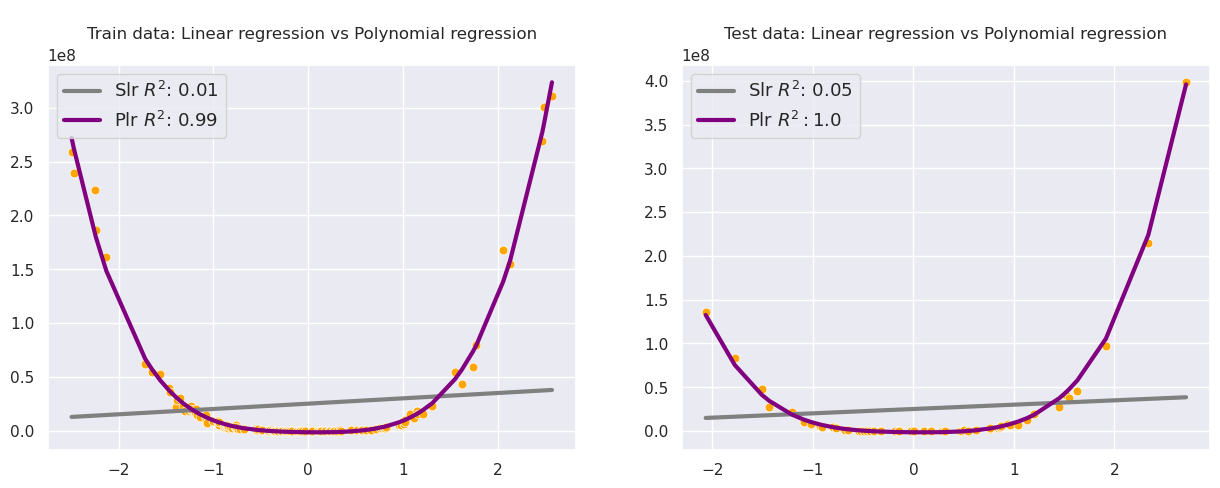

In [29]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

sns.scatterplot(x=X_train.reshape(-1,), y=y_train.reshape(-1,),
                c="orange", s=40, ax=ax[0])

sns.lineplot(x=X_train.reshape(-1,), y=y_hat_lin_train.reshape(-1,),
            label=f"Slr $R^2$: {np.round(r2_score_lin_train,2)}",
            linewidth=3, c="gray", ax=ax[0])

sns.lineplot(x=X_train.reshape(-1,), y=y_hat_poly_train.reshape(-1,),
            label=f"Plr $R^2$: {np.round(r2_score_poly_train,2)}",
            linewidth=3, c="purple", ax=ax[0])

ax[0].set_title("\nTrain data: Linear regression vs Polynomial regression\n")

ax[0].legend(prop={"size":13})

sns.scatterplot(x=X_test.reshape(-1,), y=y_test.reshape(-1,),
                c="orange", s=40, ax=ax[1])

sns.lineplot(x=X_test.reshape(-1,), y=y_hat_lin_test.reshape(-1,),
            label=f"Slr $R^2$: {np.round(r2_score_lin_test,2)}",
            linewidth=3, c="gray", ax=ax[1])

sns.lineplot(x=X_test.reshape(-1,), y=y_hat_poly_test.reshape(-1,),
            label=f"Plr $R^2: {np.round(r2_score_poly_test,2)}$",
            linewidth=3, c="purple", ax=ax[1])

ax[1].set_title("\nTest data: Linear regression vs Polynomial regression\n")

ax[1].legend(prop={"size":13})

plt.show()

### Choosing the best grade

Here we chose our degree as four because we had prior knowledge about y. But in reality, this is not the case. What is usually done is to choose multiple values for the degree and, consequently, several models are constructed. K-fold cross-validation is performed on these models (which will not be discussed here), and based on this, the model with the lowest error, the one with the best performance, is determined and chosen.

Below, you can see, using the same dataset, the modeled line using different degrees (left) and the associated error and R^2 using each degree determined (right). This error was calculated using mean square error (MSE), below is the formula.

$$MSE = \frac{1}{n} \sum_{i=1}^n{(y_i-\hat{y}_i)^2}$$

Where $y_i$ are the actual values, $\hat{y}_i$ are the predicted values, and $n$ is the number of elements in the sample. Again, sklearn already provides us with a way to do this.

In [30]:
def makePlotPoly(X_train, y_train, X_test, y_test, degree):
    
    # Min-max axes
    
    max_x = np.array([X_train.max(), X_test.max()]).max()
    min_x = np.array([X_train.min(), X_test.min()]).min()
    max_y = np.array([y_train.max(), y_test.max()]).max()
    min_y = np.array([y_train.min(), y_test.min()]).min()
    
    # Defining empty list to storage the coordinates y
    coord_X = np.arange(1, degree + 1)
    coord_train = []
    coord_test = []
    
    pal_colors = sns.color_palette("tab10", degree + 1)
    
    fig, ax = plt.subplots(2,2, figsize=(17,9))
    fig.subplots_adjust(hspace = 0.4)
    
    ax[0,0].scatter(X_train, y_train, color=pal_colors[0], linewidths=3)
    ax[1,0].scatter(X_test, y_test, color=pal_colors[0], linewidths=3)

    for i in range(1, degree + 1):
    
        # Defining poly features
        poly_features = PolynomialFeatures(degree=i, include_bias=False)
        X_poly_train = poly_features.fit_transform(X_train)
        X_poly_test = poly_features.transform(X_test)
        
        # Creating model and R^2 and MSE evaluation
        reg = LinearRegression()
        reg.fit(X_poly_train, y_train)
        y_hat_train = reg.predict(X_poly_train)
        y_hat_test = reg.predict(X_poly_test)
        
        r2_score_train = np.round(r2_score(y_train, y_hat_train),2)
        r2_score_test = np.round(r2_score(y_test, y_hat_test),2)
        
        MSE_train = mean_squared_error(y_train, y_hat_train, squared=True)
        MSE_test = mean_squared_error(y_test, y_hat_test, squared=True)
        
        coord_train.append(MSE_train)
        coord_test.append(MSE_test)
        
        # Plot best fit line train
        ax[0,0].plot(X_train, y_hat_train, label=f"Degree {i}", color=pal_colors[i], linewidth=3)
        ax[0,0].set_title("Fit lines on training data with different degrees")
        ax[0,0].set(xlabel="$X$", ylabel="Y")
        ax[0,0].legend(loc="upper right")
        ax[0,0].grid()
        
        # Plot MSE train
        ax[0,1].scatter(i, MSE_train, label=f"$R^2={r2_score_train}$", color=pal_colors[i], linewidths=3)
        ax[0,1].set_title("Performance of the model on training data")
        ax[0,1].set(xlabel="Degree", ylabel="MSE")
        ax[0,1].legend(loc="upper right")
        ax[0,1].grid()
        
        # Plot best fit line test
        ax[1,0].plot(X_test, y_hat_test, label=f"Degree {i}", color=pal_colors[i], linewidth=3)
        ax[1,0].set_title("Fit lines on testing data with different degrees")
        ax[1,0].set(xlabel="$X$", ylabel="Y")
        ax[1,0].legend(loc="upper right")
        ax[1,0].grid()
        
        # Plot MSE test
        ax[1,1].scatter(i, MSE_test, label=f"$R^2={r2_score_test}$", color=pal_colors[i], linewidths=3)
        ax[1,1].set_title("Performance of the model on testing data")
        ax[1,1].set(xlabel="Degree", ylabel="MSE")
        ax[1,1].legend(loc="upper right")
        ax[1,1].grid()
        
    ax[0,1].plot(coord_X,coord_train,c="gray")
    ax[1,1].plot(coord_X,coord_test ,c="gray")

    plt.show()

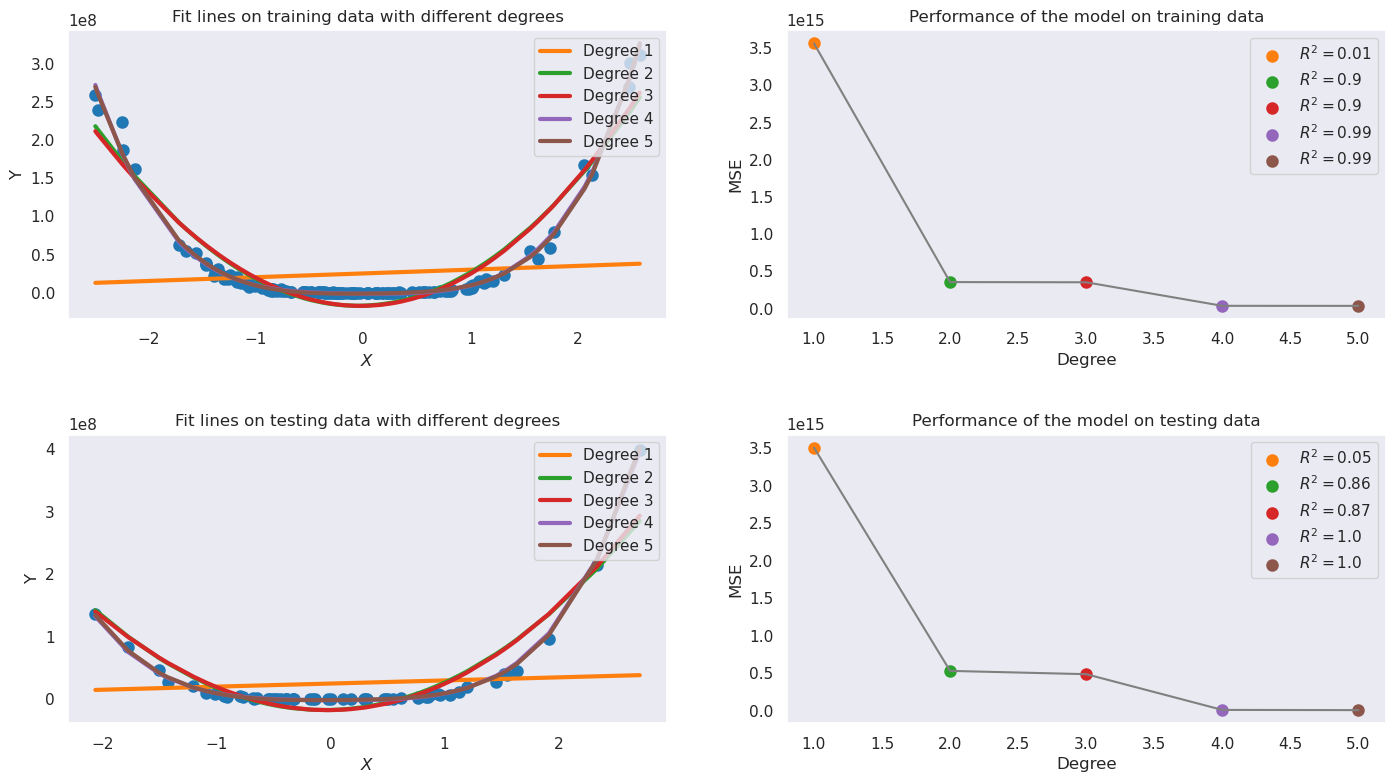

In [31]:
makePlotPoly(X_train, y_train, X_test, y_test, degree=5)

In summary, the function presented earlier takes our data $X$ and $y$ for both training and testing, performs multiple polynomial regressions based on the degree we provide, calculates $R^2$ and MSE, and plots them.

To conclude this notebook, we observe that for degree one (simple linear regression, in orange), the error is high, and the coefficient of determination is deficient. It is a model that does not fit the data at all. It can be seen that this trend changes as the degree is increased, improving the model, but from degree 5 onwards, no improvement is observed. Therefore, degree 4 seems appropriate for this model.

Remember that these data were created, and little noise was introduced. Although degree 5 seems to perform just as well as degree 4, in real data, it could result in overfitting the model, with good performance on training data but worse on testing data. Therefore, a value should be chosen that has a good balance between your training and testing metrics.

On the other hand, here we have mainly evaluated the models based on their $R^2$, but it should be noted that these are not the only criteria that can be used when choosing a model. For example, choosing degree 5 in our previous example gives equally good performance as degree 4, but degree 5 makes the model more complex. In this situation, the best model will not be the one that considers the most variables, but the one that is more flexible with new data and simpler.